# Paul Cascarino's solution for Multi-Class Prediction of Obesity Risk

This notebook represents my participation in the Multiclass Classification for Obesity Risk competition Season 4 Episode 2.

I will initially experiment with various basic models 
and aim to improve the accuracy score with different models.

## Table of contents

1. Introduction
2. Import librairies and data
3. Data analysis
4. Data preprocessing and Feature engineering
5. Model
    - 5.1- Bayesian classification
    - 5.2- Random Forest
    - 5.3- 
6. Model evaluation 
7. Final submission


## 1. Introduction

We have to predict the obesity risk with these feature : 

| Feature                        | Explanation                                              |
|-------------------------------|----------------------------------------------------------|
| Gender                        | Gender of the individual (Male/Female)                    |
| Age                           | Age of the individual                                     |
| Height                        | Height of the individual                                  |
| Weight                        | Weight of the individual                                  |
| Family History with Overweight| Presence of overweight history in the family              |
| FAVC (Frequent Consumption of Vegetables)| Indicates whether the person frequently consumes vegetables|
| FCVC (Food Consumption Frequency) | Frequency of overall food consumption                     |
| NCP (Number of Main Meals)    | Number of main meals consumed per day                      |
| CAEC (Consumption of food between meals)| Frequency of consuming food between meals         |
| SMOKE                         | Smoking status (Yes/No)                                   |
| CH2O (Daily Water Consumption)| Daily water intake                                        |
| SCC (Caloric Consumption Monitoring)| Caloric consumption monitoring (Yes/No)              |
| FAF (Physical Activity Frequency)| Frequency of physical activity per week                |
| TUE (Time Using Technology Devices)| Time spent using technology devices (hours per day)|
| CALC (Alcohol Consumption)| Frequency of alcohol consumption                          |
| MTRANS (Mode of Transportation)| Mode of transportation used by the individual         |




## 2. Import librairies and data

The process of importing data differs based on whether you are running the notebook locally or on Kaggle.

In [73]:
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings("ignore")


import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
encodeur = LabelEncoder()

from sklearn.preprocessing import StandardScaler

import random
random.seed(14)
from sklearn.model_selection import train_test_split

from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB

from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import GridSearchCV

from sklearn.ensemble import RandomForestClassifier

import optuna
from sklearn.model_selection import cross_val_score
from xgboost import XGBClassifier

from sklearn.model_selection import StratifiedKFold




from sklearn.metrics import accuracy_score

Import data from Kaggle : 

In [74]:
#import os
#for dirname, _, filenames in os.walk('/kaggle/input'):
#    for filename in filenames:
#        print(os.path.join(dirname, filename))

# df_train = pd.read_csv('/kaggle/input/playground-series-s4e2/train.csv', index_col=0)
# df_test = pd.read_csv('/kaggle/input/playground-series-s4e2/test.csv')

Import data in local : 

In [75]:
df_train = pd.read_csv('data/train.csv')
df_test = pd.read_csv('data/test.csv')
df_train.drop('id', axis=1, inplace=True)

id = df_test['id']
df_test.drop('id', axis=1, inplace=True)



df_test.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
0,Male,26.899886,1.848294,120.644178,yes,yes,2.938616,3.000000,Sometimes,no,2.825629,no,0.855400,0.000000,Sometimes,Public_Transportation
1,Female,21.000000,1.600000,66.000000,yes,yes,2.000000,1.000000,Sometimes,no,3.000000,no,1.000000,0.000000,Sometimes,Public_Transportation
2,Female,26.000000,1.643355,111.600553,yes,yes,3.000000,3.000000,Sometimes,no,2.621877,no,0.000000,0.250502,Sometimes,Public_Transportation
3,Male,20.979254,1.553127,103.669116,yes,yes,2.000000,2.977909,Sometimes,no,2.786417,no,0.094851,0.000000,Sometimes,Public_Transportation
4,Female,26.000000,1.627396,104.835346,yes,yes,3.000000,3.000000,Sometimes,no,2.653531,no,0.000000,0.741069,Sometimes,Public_Transportation


## 3. Data Analysis

Let's see the dimension of our dataframe :

In [76]:
print(df_train.shape)
print(df_test.shape)

(20758, 17)
(13840, 16)


We can check if there is missing values : 

In [77]:
print(df_train.isnull().sum().sum())
print(df_test.isnull().sum().sum())

0
0


Make column names understandable : 

In [78]:
feature_dict = {
    'Gender': 'Gender of the individual (Male/Female)',
    'Age': 'Age of the individual',
    'Height': 'Height of the individual',
    'Weight': 'Weight of the individual',
    'family_history_with_overweight': 'Presence of overweight history in the family',
    'FAVC': 'Frequent Consumption of Vegetables (Indicates whether the person frequently consumes vegetables)',
    'FCVC': 'Food Consumption Frequency (Frequency of overall food consumption)',
    'NCP': 'Number of Main Meals (Number of main meals consumed per day)',
    'CAEC': 'Consumption of food between meals (Frequency of consuming food between meals)',
    'SMOKE': 'Smoking status (Yes/No)',
    'CH2O': 'Daily Water Consumption (Daily water intake)',
    'SCC': 'Caloric Consumption Monitoring (Caloric consumption monitoring, Yes/No)',
    'FAF': 'Physical Activity Frequency (Frequency of physical activity per week)',
    'TUE': 'Time Using Technology Devices (Time spent using technology devices, hours per day)',
    'CALC': 'Alcohol Consumption (Frequency of alcohol consumption)',
    'MTRANS': 'Mode of Transportation (Mode of transportation used by the individual)'
}

### 3.0- Predictive Variable

Permitt to get the good order of 'NObeyesdad'

In [79]:
print(df_train['NObeyesdad'].unique())

# Define the ordinal order for 'NObeyesdad'
order_pred = [
    'Insufficient_Weight',
    'Normal_Weight',
    'Overweight_Level_I',
    'Overweight_Level_II',
    'Obesity_Type_I',
    'Obesity_Type_II',
    'Obesity_Type_III'
]

# transp_dict = {
#     'Insufficient_Weight':0,
#     'Normal_Weight':1,
#     'Overweight_Level_I':2,
#     'Overweight_Level_II':3,
#     'Obesity_Type_I':4,
#     'Obesity_Type_II':5,
#     'Obesity_Type_III':6,

# }
# df_train['NObeyesdad'] = df_train['NObeyesdad'].map(transp_dict)

# print(df_train['NObeyesdad'].unique())

['Overweight_Level_II' 'Normal_Weight' 'Insufficient_Weight'
 'Obesity_Type_III' 'Obesity_Type_II' 'Overweight_Level_I'
 'Obesity_Type_I']


### 3.1- Numerical Features

Let's look the column __Age__, __Height__, __Weight__, __FCFV__, __NCP__, __CH20__

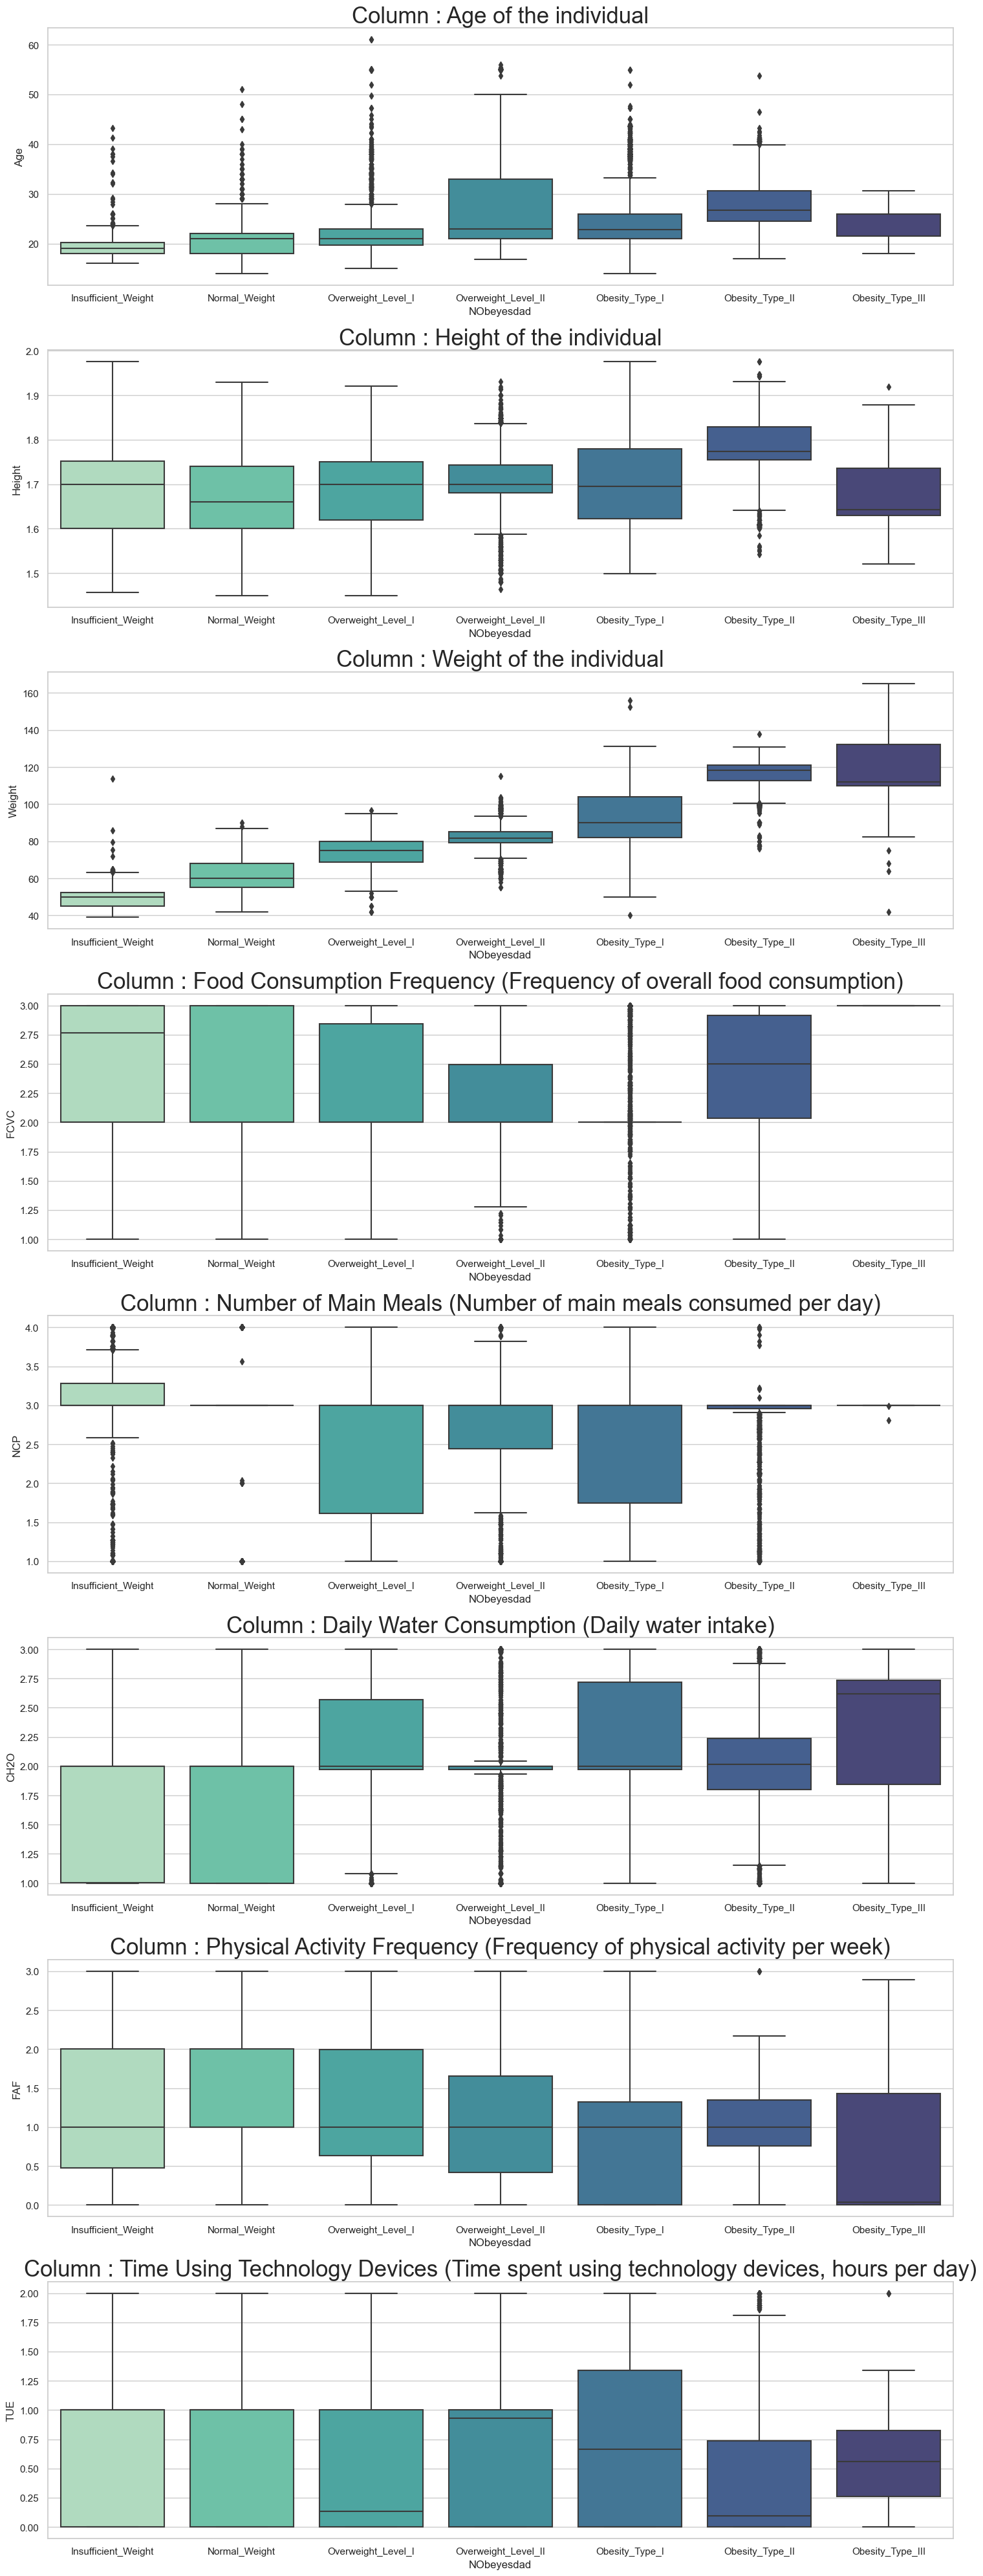

In [80]:
numerical_features = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']

sns.set_theme(style="whitegrid")
custom_palette = sns.color_palette("mako_r",len(numerical_features)+1)

fig, axes = plt.subplots(nrows=len(numerical_features), ncols=1, figsize=(15, 40))


axes = axes.flatten()

for i, column in enumerate(numerical_features):


    sns.boxplot(x='NObeyesdad', y=column, data=df_train, ax=axes[i], palette=custom_palette, order=order_pred)
    
    axes[i].set_title(f'Column : {feature_dict[column]}', fontsize=25)

# Adjust layout for better spacing
plt.tight_layout()
plt.show()



We can see for example that : 

- That the weight make a linear progression of our type of people weight
- ...


Numerical Correlation plot : 

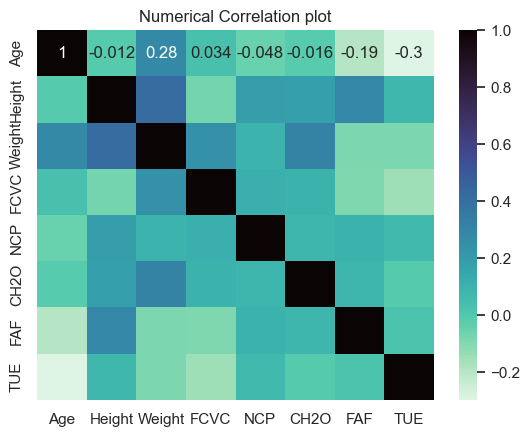

In [81]:
sns.heatmap(df_train[numerical_features].corr(), annot=True, cmap ="mako_r")
plt.title('Numerical Correlation plot')
plt.show()

We can see that : 
- Weight and Height have positive corr and FAF

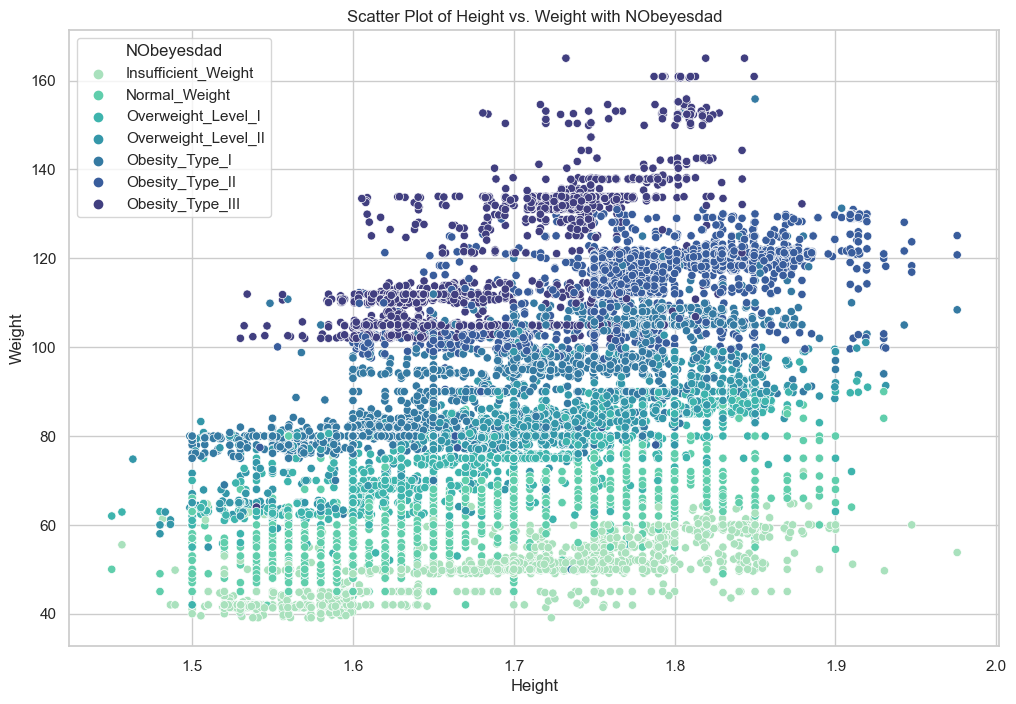

In [82]:
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df_train, x="Height", y="Weight", hue = 'NObeyesdad', palette = custom_palette, hue_order=order_pred )
plt.title('Scatter Plot of Height vs. Weight with NObeyesdad')
plt.show()

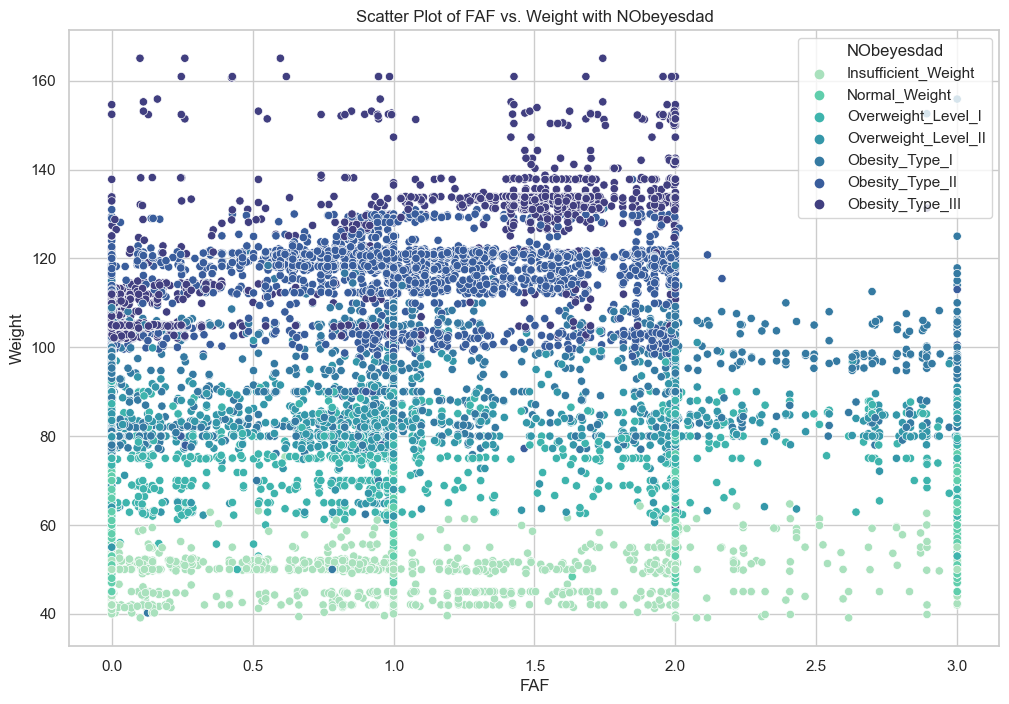

In [83]:
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df_train, x="FAF", y="Weight", hue = 'NObeyesdad', palette = custom_palette, hue_order=order_pred )
plt.title('Scatter Plot of FAF vs. Weight with NObeyesdad')
plt.show()

### 3.2 Categorical Features

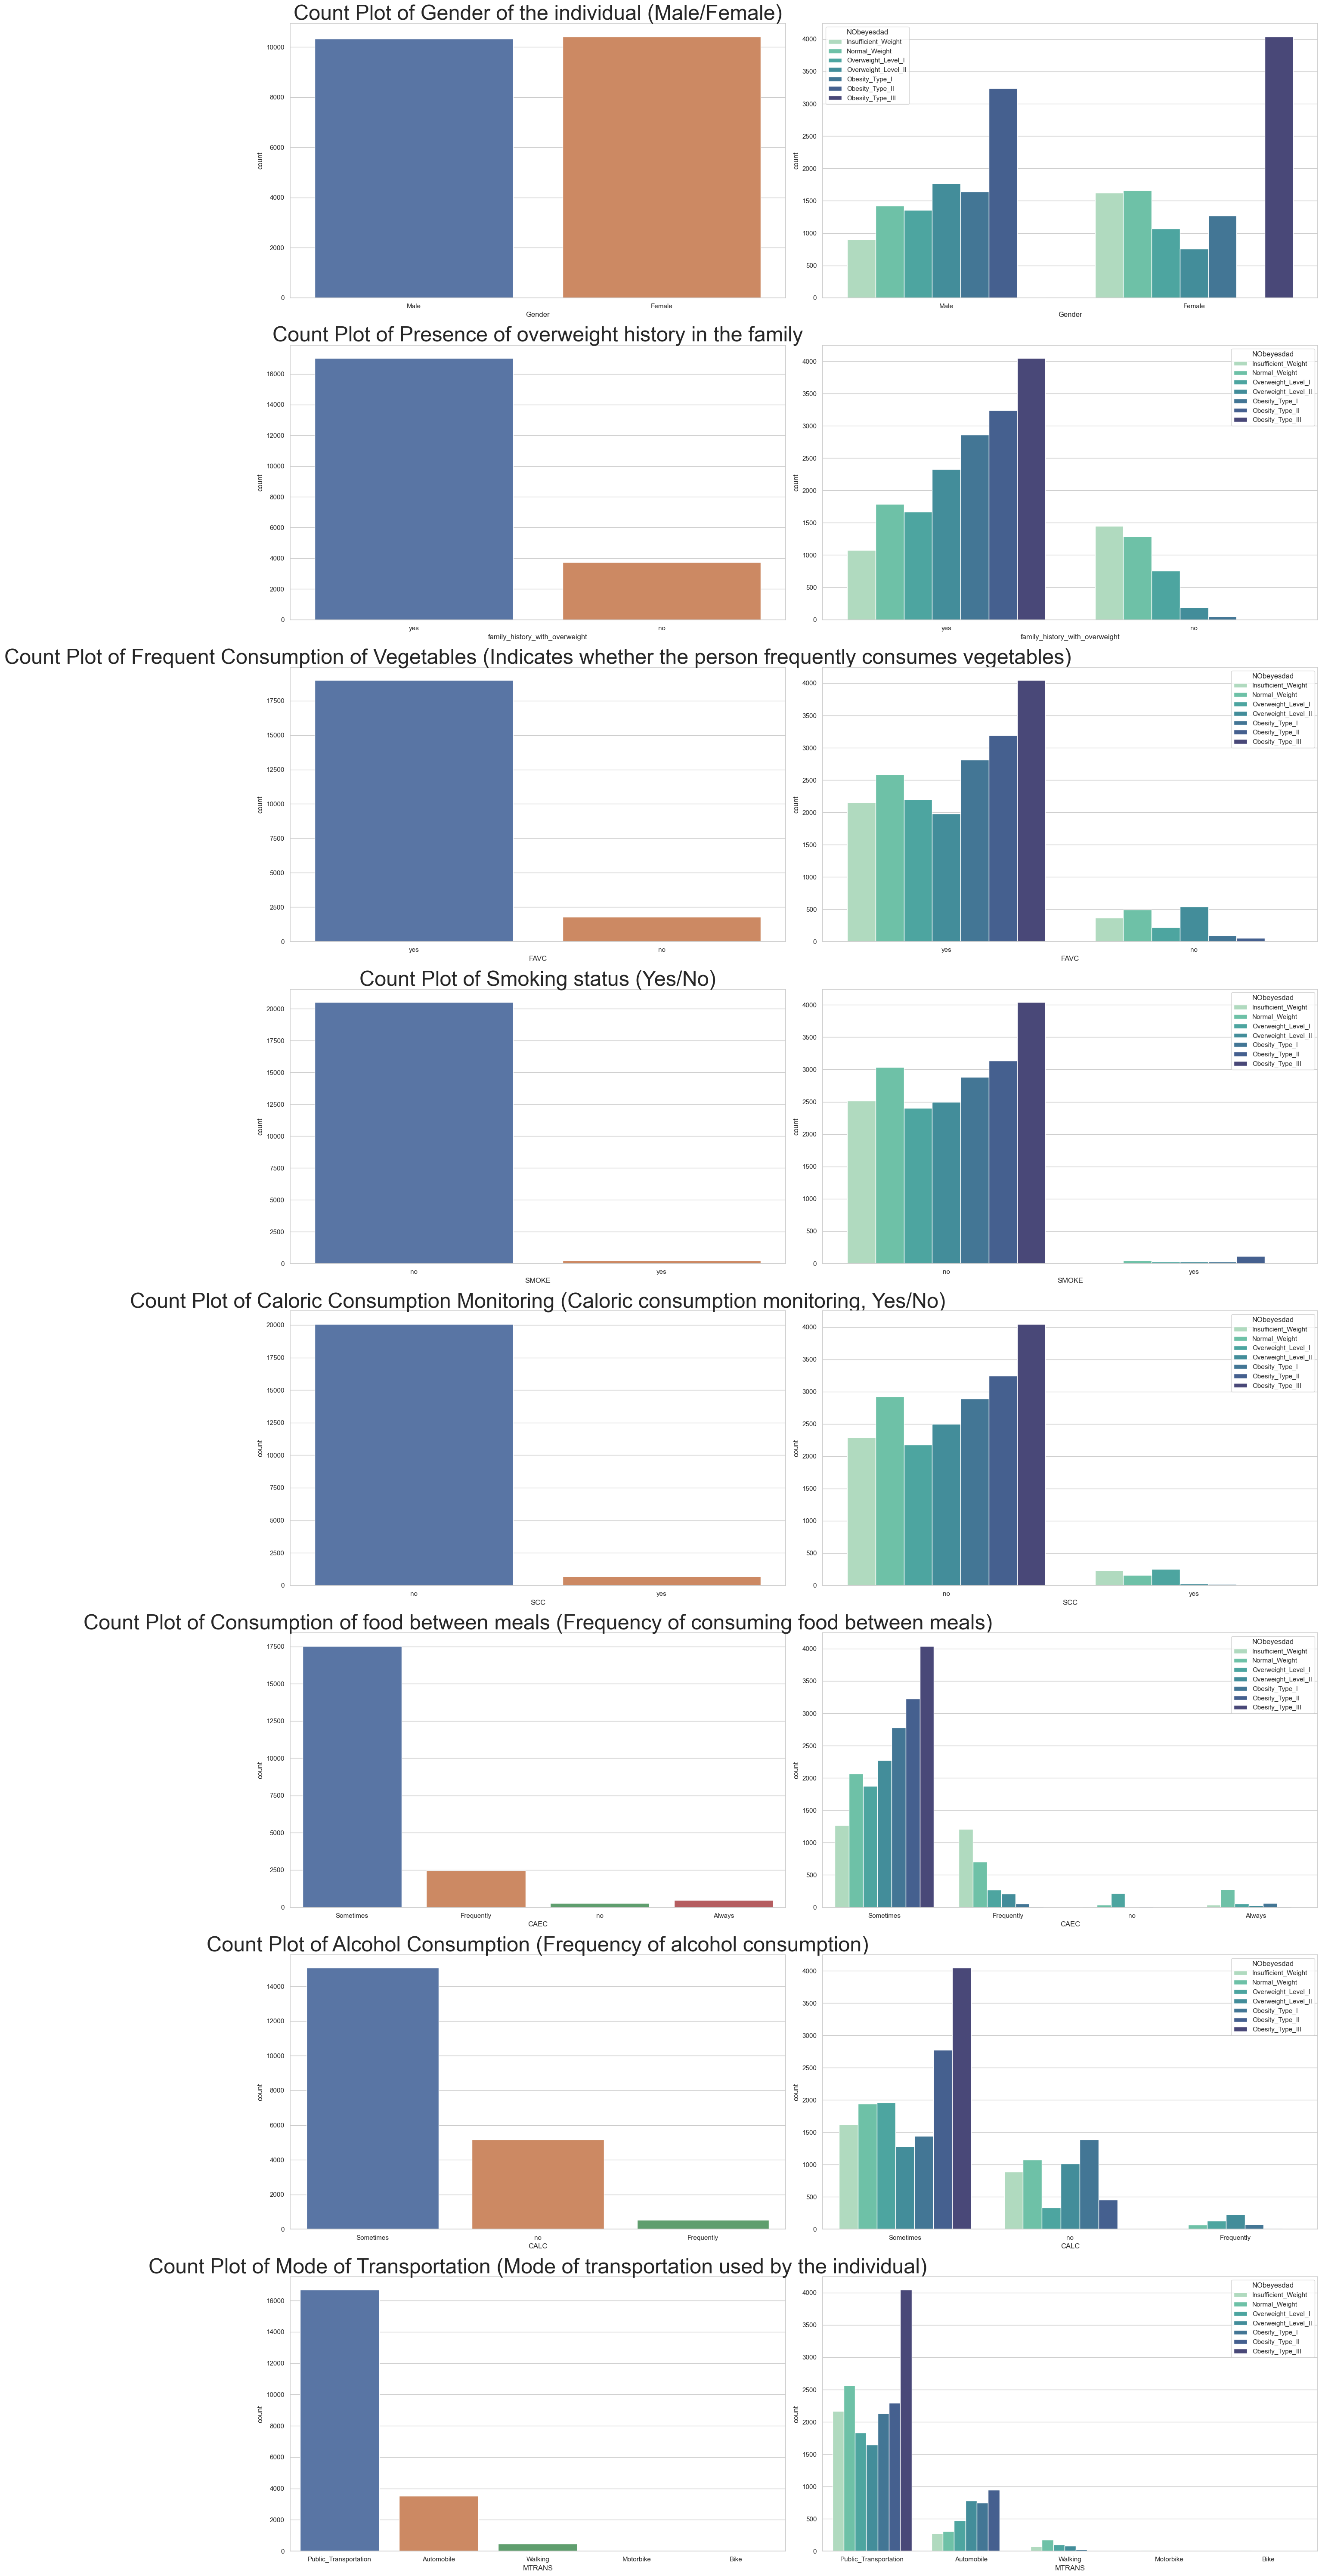

In [84]:
categorical_features = ['Gender', 'family_history_with_overweight', 'FAVC', 'SMOKE', 'SCC', 'CAEC', 'CALC', 'MTRANS']
target_variable = 'NObeyesdad'

# Make our graph more beautiful
sns.set_theme(style="whitegrid")
custom_palette = sns.color_palette("mako_r", len(categorical_features) + 1)


fig, axes = plt.subplots(nrows=len(categorical_features), ncols=2, figsize=(25, 60))

axes = axes.flatten()

for i, column in enumerate(categorical_features):
    # Plot a pie chart using Seaborn
    sns.countplot(x=column, data=df_train, ax=axes[i*2])
    axes[i*2].set_title(f'Count Plot of {feature_dict[column]}', fontsize=35)


    sns.countplot(x=column, hue=target_variable, data=df_train, ax=axes[i*2 + 1], palette=custom_palette, hue_order=order_pred)



plt.tight_layout()
plt.show()

We can see for example that : 

- ...


## 4. Data preprocessing and Feature engineering

In [85]:
df_train.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II
1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight
2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight
3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III
4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II


Copy the original dataframe to compare the model on both.

In [86]:
df_preprocessed = df_train.copy()
df_preprocessed_test = df_test.copy()

### 4.0- Feature engineering

BMI stands for Body Mass Index. It is a numerical value of a person's weight in relation to their height.

In [87]:
# df_preprocessed['BMI'] = df_preprocessed['Weight'] / (df_preprocessed['Height']*2)
# df_preprocessed_test['BMI'] = df_preprocessed_test['Weight'] / (df_preprocessed_test['Height']*2)

# plt.figure(figsize=(15,10))
# sns.boxplot(x='NObeyesdad', y='BMI', data=df_preprocessed, palette=custom_palette, order=order_pred)
# plt.plot()

- Underweight: BMI less than 18.5

- Normal weight: BMI between 18.5 and 24.9

- Overweight: BMI between 25 and 29.9

- Obese: BMI of 30 or greater

In [88]:
# df_preprocessed['BMI_Category'] = pd.cut(df_preprocessed['BMI'],
#                                          bins=[-float('inf'), 18.5, 24.9, 29.9, float('inf')],
#                                          labels=[0, 1, 2, 3])
# df_preprocessed_test['BMI_Category'] = pd.cut(df_preprocessed_test['BMI'],
#                                          bins=[-float('inf'), 18.5, 24.9, 29.9, float('inf')],
#                                          labels=[0, 1, 2, 3])


# fig, axes = plt.subplots(ncols=2, figsize=(15, 10))

# axes = axes.flatten()


# sns.countplot(x='BMI_Category', data=df_preprocessed, ax=axes[0])
# axes[1].set_title(f'Count Plot of BMI_Category', fontsize=35)


# sns.countplot(x='BMI_Category', hue='NObeyesdad', data=df_preprocessed, ax=axes[1], palette=custom_palette, hue_order=order_pred)



# plt.tight_layout()
# plt.show()

### 4.1- Numerical features

In [89]:
# Assuming X_train contains the features you want to standardize
numerical_features = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE', 'BMI']

In [90]:
# Créer un dictionnaire de mappage
mapping = {
    'Insufficient_Weight': 0,
    'Normal_Weight': 1,
    'Overweight_Level_I': 2,
    'Overweight_Level_II': 3,
    'Obesity_Type_I': 4,
    'Obesity_Type_II': 5,
    'Obesity_Type_III': 6
}

# Appliquer le mapping à la colonne 'NObeyesdad'
df_preprocessed['NObeyesdad'] = df_preprocessed['NObeyesdad'].map(mapping)


### 4.2- Categorical features

Let's look the column __Gender__ : We will make a Dummy encoding

In [91]:
def gender_pre(col):
    tmp_col = col.copy()
    return tmp_col.replace({'Male':1, 'Female':0})


df_preprocessed['Gender'] =  gender_pre(df_preprocessed['Gender'])
df_preprocessed_test['Gender'] =  gender_pre(df_preprocessed_test['Gender'])

print('Gender Percentage Male :', df_preprocessed['Gender'].mean())


Gender Percentage Male : 0.497928509490317


Let's look the column __family...__, __FAVC__, __SMOKE__, __SCC__ : We will also make a Dummy encoding

In [92]:
def yesno_pre(col):
    tmp_col = col.copy()
    return tmp_col.replace({'yes':1, 'no':0})


df_preprocessed['family_history_with_overweight'] =  yesno_pre(df_preprocessed['family_history_with_overweight'])
df_preprocessed['FAVC'] =  yesno_pre(df_preprocessed['FAVC'])
df_preprocessed['SMOKE'] =  yesno_pre(df_preprocessed['SMOKE'])
df_preprocessed['SCC'] =  yesno_pre(df_preprocessed['SCC'])

df_preprocessed_test['family_history_with_overweight'] =  yesno_pre(df_preprocessed_test['family_history_with_overweight'])
df_preprocessed_test['FAVC'] =  yesno_pre(df_preprocessed_test['FAVC'])
df_preprocessed_test['SMOKE'] =  yesno_pre(df_preprocessed_test['SMOKE'])
df_preprocessed_test['SCC'] =  yesno_pre(df_preprocessed_test['SCC'])


print('Mean of family overweighted', df_preprocessed['family_history_with_overweight'].mean())
print('Mean of FAVC', df_preprocessed['FAVC'].mean())
print('Mean of person who SMOKE', df_preprocessed['SMOKE'].mean())
print('Mean of SCC', df_preprocessed['SCC'].mean())

Mean of family overweighted 0.819635803063879
Mean of FAVC 0.9144426245303016
Mean of person who SMOKE 0.011802678485403218
Mean of SCC 0.033095673957028615


Let's look the column __CAEC__, __CALC__ : We will convert into numbers scaling by the frequency because they are ordinal data

In [93]:
def temp_pre(col):
    tmp_col = col.copy()
    return tmp_col.replace({'Sometimes':1, 'Frequently':2, 'no':0, 'Always':3})

df_preprocessed['CAEC'] =  temp_pre(df_preprocessed['CAEC'])
df_preprocessed['CALC'] =  temp_pre(df_preprocessed['CALC'])

df_preprocessed_test['CAEC'] =  temp_pre(df_preprocessed_test['CAEC'])
df_preprocessed_test['CALC'] =  temp_pre(df_preprocessed_test['CALC'])

print('CAEC', df_preprocessed['CAEC'].mean())
print('CALC', df_preprocessed['CALC'].mean())

CAEC 1.151700549185856
CALC 0.7767607669332306


Same for the MTRANS which is ordinal based on the mode of transportation.

In [94]:
 def one_hot_encode(df, column):
    df_encoded = pd.get_dummies(df[column], prefix=column)
    df = pd.concat([df, df_encoded], axis=1)
    df = df.drop(column, axis=1)
    return df


df_preprocessed = one_hot_encode(df_preprocessed, 'MTRANS')
df_preprocessed_test = one_hot_encode(df_preprocessed_test, 'MTRANS')

In [95]:
df_preprocessed.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,...,SCC,FAF,TUE,CALC,NObeyesdad,MTRANS_Automobile,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
0,1,24.443011,1.699998,81.669950,1,1,2.000000,2.983297,1,0,...,0,0.000000,0.976473,1,3,False,False,False,True,False
1,0,18.000000,1.560000,57.000000,1,1,2.000000,3.000000,2,0,...,0,1.000000,1.000000,0,1,True,False,False,False,False
2,0,18.000000,1.711460,50.165754,1,1,1.880534,1.411685,1,0,...,0,0.866045,1.673584,0,0,False,False,False,True,False
3,0,20.952737,1.710730,131.274851,1,1,3.000000,3.000000,1,0,...,0,1.467863,0.780199,1,6,False,False,False,True,False
4,1,31.641081,1.914186,93.798055,1,1,2.679664,1.971472,1,0,...,0,1.967973,0.931721,1,3,False,False,False,True,False


In [96]:
df_preprocessed.head().T

,0,1,2,3,4
Gender,1,0,0,0,1
Age,24.443011,18.0,18.0,20.952737,31.641081
Height,1.699998,1.56,1.71146,1.71073,1.914186
Weight,81.66995,57.0,50.165754,131.274851,93.798055
family_history_with_overweight,1,1,1,1,1
FAVC,1,1,1,1,1
FCVC,2.0,2.0,1.880534,3.0,2.679664
NCP,2.983297,3.0,1.411685,3.0,1.971472
CAEC,1,2,1,1,1
SMOKE,0,0,0,0,0


In [97]:
# df_preprocessed['BMI_Category'] = df_preprocessed['BMI_Category'].astype('category')
# df_preprocessed_test['BMI_Category'] = df_preprocessed_test['BMI_Category'].astype('category')

## 3. Machine Learning

Let's divide our train dataset into train and test seet to validate our model

In [98]:
test_size = 0.2
random_state = 29 # date of next competition
X_train, X_test, y_train, y_test = train_test_split(
                                        df_preprocessed.drop('NObeyesdad', axis=1),
                                        df_preprocessed['NObeyesdad'],
                                        test_size = test_size,
                                        random_state = random_state
                                    )   

# Delete on kaggle
#X_train.drop('id', axis=1, inplace=True)
# #X_test.drop('id', axis=1, inplace=True)
# X_train.drop('BMI_Category', axis=1, inplace=True)
# X_test.drop('BMI_Category', axis=1, inplace=True)
print('X_train shape', X_train.shape)
print('X_test shape', X_test.shape)
print('y_train shape', y_train.shape)
print('y_test shape', y_test.shape)

X_train shape (16606, 20)
X_test shape (4152, 20)
y_train shape (16606,)
y_test shape (4152,)


Now we can make a function (for XGBoost)to evaluate and fit our next models : 

take in : https://www.kaggle.com/code/mariushinsberger/xgboost-on-obesity-risk

In [99]:
def fit_plot(model, X_train, y_train, X_val, y_val, verbose=False):
    eval_set = [(X_train, y_train), (X_val, y_val)]
    model.fit(X_train, y_train, eval_set=eval_set, verbose=verbose)
    
    acc_train = accuracy_score(y_train, model.predict(X_train))
    acc_val = accuracy_score(y_val, model.predict(X_val))
    print(f"train_accuracy: {acc_train:.4f}\ntest_accuracy: {acc_val:.4f}")
    
    results = model.evals_result()
    val_mlogloss = results["validation_1"]["mlogloss"]
    best_epopch = min(val_mlogloss)
    i_best_epoch = val_mlogloss.index(best_epopch)
    print(f"Best mlogloss: {best_epopch}\nBest epoch: {i_best_epoch}")
    epochs = len(results['validation_0']['mlogloss'])
    x_axis = range(0, epochs)
    
    fig, ax = plt.subplots()
    ax.plot(x_axis, results['validation_0']['mlogloss'], label='Train')
    ax.plot(x_axis, results['validation_1']['mlogloss'], label='Test')
    ax.plot(i_best_epoch, best_epopch, marker="o", color="green", label="Best")
    ax.legend()
    plt.xlabel("Epochs")
    plt.ylabel("M Log Loss")
    plt.title("M Log Loss developement while fitting")
    plt.show()

### 3.1 Bayesian classification

A first implementation

In [100]:
mnb_modele = GaussianNB()

mnb_modele.fit(X_train, y_train)

y_pred = mnb_modele.predict(X_test)

print ("accuracy: ", accuracy_score(y_test, y_pred))

accuracy:  0.6197013487475915


### 3.2- Logistic classification

Need to staandardize values for reach the 85 % ... I don't have the time to recompute this data processing =( 

I will loose 3 minutes too much !!!!

In [101]:
logistic_model = LogisticRegression()

logistic_model.fit(X_train, y_train)

y_pred = logistic_model.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
print("Précision du modèle de régression logistique :", accuracy)


Précision du modèle de régression logistique : 0.7008670520231214


### 3.3 Random Forest

In [102]:
RFC_model = RandomForestClassifier(random_state=29)

RFC_model.fit(X_train, y_train)
y_pred_RFC = RFC_model.predict(X_test)


accuracy_RFC = accuracy_score(y_test, y_pred_RFC)

print("accuracy:", accuracy_RFC)


accuracy: 0.9000481695568401


With Grid Search : 

In [116]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(RandomForestClassifier(random_state=29), param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_

# Create and train the improved model
improved_RFC_model = RandomForestClassifier(random_state=29, **best_params)
improved_RFC_model.fit(X_train, y_train)


KeyboardInterrupt: 

### 3.4 XG Boost

https://blent.ai/blog/a/xgboost-tout-comprendre

https://forecastegy.com/posts/xgboost-hyperparameter-tuning-with-optuna/

train_accuracy: 0.9571
test_accuracy: 0.9111
Best mlogloss: 0.2629993192287354
Best epoch: 199


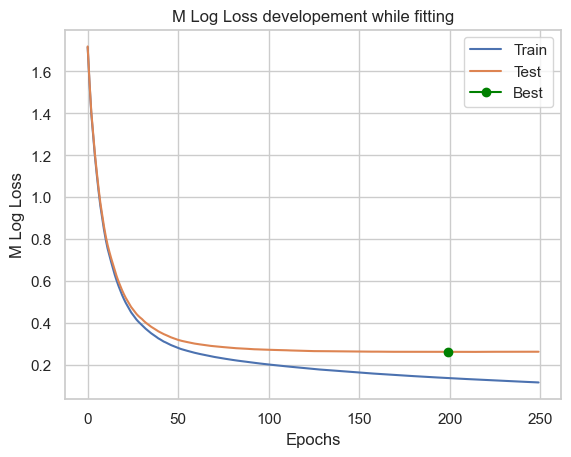

In [104]:
first_params = {
    'learning_rate' :0.1,
    'n_estimators':1000,
    'early_stopping_rounds':50,
    'max_depth':5,
    'min_child_weight':1,
    'gamma':0,
    'colsample_bytree':0.8,
    'subsample':0.8,
    'objective': 'multi:softprob',
    'eval_metric' : 'mlogloss',
    'nthread':-1,
    'random_state':29
}


first_xgb_model = XGBClassifier(**first_params)

fit_plot(first_xgb_model, X_train, y_train, X_test, y_test)

Let's tune our hyperparameters

In [105]:
def objective(trial):
    params = {
        'objective': 'multi:softprob',
        "eval_metric":'mlogloss',
        'n_estimators': trial.suggest_int('n_estimators', 100, 1000), # or 1000 the number of trees you’ll be training
        'verbosity': 0, # silent mode
        'learning_rate': trial.suggest_float('learning_rate',  0.001, 0.1, log=True), # optimization algorithm should sample values on a logarithmic scale
        'max_depth': trial.suggest_int('max_depth', 1, 20), # decides the complexity of each tree in your model
        'subsample': trial.suggest_float('subsample', 0, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0, 1.0),
        'reg_alpha': trial.suggest_float('reg_alpha', 1e-8, 10, log=True), # regularization
        'reg_lambda': trial.suggest_float('reg_lambda', 1e-8, 10, log=True),# regularization
        'min_child_weight': trial.suggest_float("min_child_weight", 10, 30),
        'gamma' : trial.suggest_float("gamma", 1e-8, 1, log=True),
        'nthread':-1,
        'random_state':29
    }

    xgb_model_opti = XGBClassifier(**params)
    accuracy = cross_val_score(xgb_model_opti, X_train, y_train, cv=5, scoring='accuracy').mean()

    return accuracy


In [107]:
import optuna.samplers

cv = StratifiedKFold(5, shuffle=True, random_state=42)

sampler = optuna.samplers.TPESampler(seed=29)
study = optuna.create_study(directions=["maximize"], sampler=sampler)
study.optimize(objective, n_trials=1)
study_df = study.trials_dataframe()
study_best = study_df.sort_values(by='value', ascending=False)
best_params = study.best_params
print(best_params)

[I 2024-02-29 21:54:10,583] A new study created in memory with name: no-name-1884f7fa-e6c8-4e45-b73e-0559035527b1
[I 2024-02-29 21:56:10,607] Trial 0 finished with value: 0.8124171958824411 and parameters: {'n_estimators': 878, 'learning_rate': 0.0037137437203576466, 'max_depth': 2, 'subsample': 0.763237204330285, 'colsample_bytree': 0.45271905759941133, 'reg_alpha': 0.0007597520246178303, 'reg_lambda': 0.034651500501048545, 'min_child_weight': 26.97810215229644, 'gamma': 0.013982982768782237}. Best is trial 0 with value: 0.8124171958824411.


{'n_estimators': 878, 'learning_rate': 0.0037137437203576466, 'max_depth': 2, 'subsample': 0.763237204330285, 'colsample_bytree': 0.45271905759941133, 'reg_alpha': 0.0007597520246178303, 'reg_lambda': 0.034651500501048545, 'min_child_weight': 26.97810215229644, 'gamma': 0.013982982768782237}


In [ ]:
#study = optuna.create_study(direction='maximize')
#study.optimize(objective, n_trials=100)  # You can adjust the number of trials

# Print the best hyperparameters and their values
#print('Best trial:')
#trial = study.best_trial
#print(f'Accuracy: {-trial.value:.4f}')
#print('Params: ')
#for key, value in trial.params.items():
#    print(f'    {key}: {value}')


0.3625422177666874[I 2024-02-26 23:11:24,028] Trial 51 finished with value: 0.9104541711013472 and parameters: {'n_estimators': 1969, 'learning_rate': 0.008878725610590252, 'max_depth': 6, 'subsample': 0.5122777385278058, 'colsample_bytree': 0.3625422177666874, 'reg_alpha': 0.5277753666887163, 'reg_lambda': 0.5770711018911217}. Best is trial 51 with value: 0.9104541711013472.

In [108]:
study_best.head()

,number,value,datetime_start,datetime_complete,duration,params_colsample_bytree,params_gamma,params_learning_rate,params_max_depth,params_min_child_weight,params_n_estimators,params_reg_alpha,params_reg_lambda,params_subsample,state
0,0,0.812417,2024-02-29 21:54:10.585764,2024-02-29 21:56:10.607030,0 days 00:02:00.021266,0.452719,0.013983,0.003714,2,26.978102,878,0.00076,0.034652,0.763237,COMPLETE


In [109]:
optuna.visualization.plot_optimization_history(study)

In [110]:
optuna.visualization.plot_parallel_coordinate(study)

In [ ]:
optuna.visualization.plot_param_importances(study)

train_accuracy: 0.9383
test_accuracy: 0.9087
Best mlogloss: 0.2642037183917101
Best epoch: 394


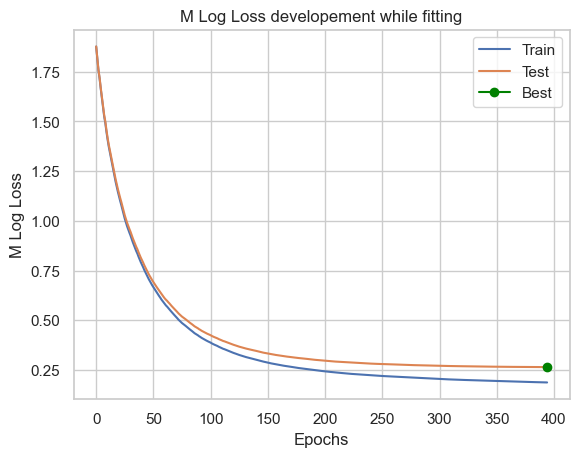

In [121]:
best_params = {
        'objective': 'multi:softprob',
        "eval_metric":'mlogloss',
        'n_estimators': 395, # or 1000 the number of trees you’ll be training
        'verbosity': 0, # silent mode
        'learning_rate':  0.0289783195915322, # optimization algorithm should sample values on a logarithmic scale
        'max_depth': 8, # decides the complexity of each tree in your model
        'subsample': 0.9784564759583926,
        'colsample_bytree': 0.6129825605558832,
        'reg_alpha': 1.432618692771464e-05, # regularization
        'reg_lambda': 0.4181375572227983,# regularization
        'min_child_weight': 18.775237938079847,
        'gamma' : 1.2803239944241047e-05,
        'nthread':-1,
        'random_state':29
    }

best_model = XGBClassifier(**best_params)

fit_plot(best_model, X_train, y_train, X_test, y_test)

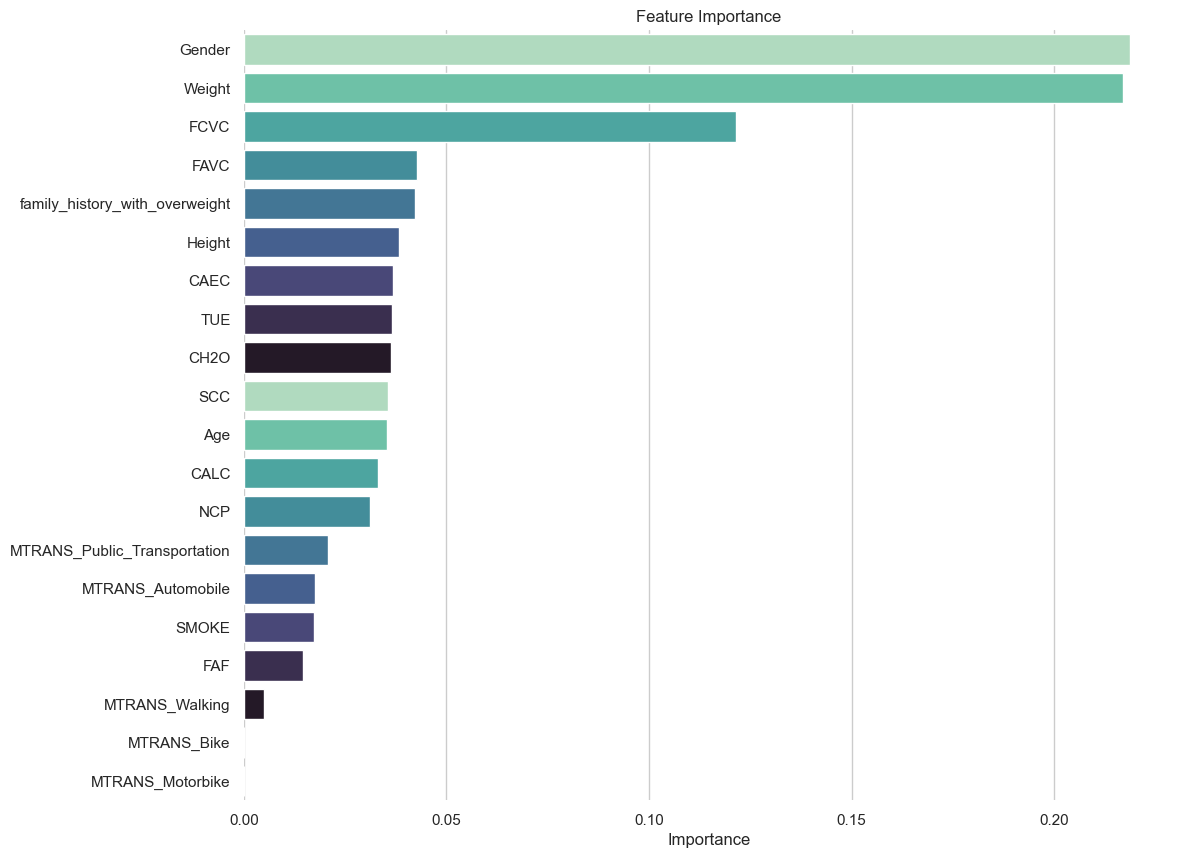

In [115]:
feature_importance = best_model.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importance})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
plt.figure(figsize=(12, 10))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette=custom_palette)
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('')
sns.despine(left=True, bottom=True)
plt.show()

## 6 Model Evaluation


## 7 Submission

Making the data preprocessing and feature engineering on my test dataframe

In [ ]:
#df_test['BMI'] = df_test['Weight'] / (df_test['Height']*2)

#df_test['BMI_Category'] = pd.cut(df_test['BMI'],
#                                         bins=[-float('inf'), 18.5, 24.9, 29.9, float('inf')],
#                                         labels=[0, 1, 2, 3])


#df_test[numerical_features] = scaler.fit_transform(df_test[numerical_features])

#df_test['Gender'] =  gender_pre(df_train['Gender'])

#df_test['family_history_with_overweight'] =  yesno_pre(df_train['family_history_with_overweight'])
#df_test['FAVC'] =  yesno_pre(df_train['FAVC'])
#df_test['SMOKE'] =  yesno_pre(df_train['SMOKE'])
#df_test['SCC'] =  yesno_pre(df_train['SCC'])

#df_test['CAEC'] =  temp_pre(df_train['CAEC'])
#df_test['CALC'] =  temp_pre(df_train['CALC'])

#df_test['MTRANS'] =  trans_pre(df_train['MTRANS'])

#df_test['BMI_Category'] = df_test['BMI_Category'].astype('category')

#df_test.drop('BMI_Category', axis=1, inplace=True)



In [ ]:
df_preprocessed_test.head()

In [ ]:
df_preprocessed_test_final = df_preprocessed_test.drop('BMI_Category', axis=1)
print(df_preprocessed_test_final.shape)
print(X_train.shape)

In [ ]:
df_preprocessed_test_final

In [ ]:
y_submit = best_model.predict(df_preprocessed_test_final)

submission_df = pd.DataFrame({"id":id,"NObeyesdad":y_submit})


transp_dict = {
    0:'Insufficient_Weight',
    1:'Normal_Weight',
    2:'Overweight_Level_I',
    3:'Overweight_Level_II',
    4:'Obesity_Type_I',
    5:'Obesity_Type_II',
    6:'Obesity_Type_III',

}

submission_df["NObeyesdad"]  = submission_df["NObeyesdad"].map(transp_dict)
#submission_df.set_index("id", inplace=True)
print(submission_df)

In [ ]:
submission_df.to_csv('submission.csv',index = False)